# **Conectamos con Google Drive e Importamos las librerias necesarias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, Eq, solve

# **Cournot con 2 firmas**

Primero se busca encontrar el equilibrio para dos firmas simétricas con costos marginales cuadráticos las cuales compiten a lo Cournot. De esta forma se tratá de modelizar como se encuentra un determinado mercado antes de la incorporación del RIGI.

Le damos valores determinados a las variables $a$, $a_0$, $a_1$ y $a_2$, y al resto de las variables no se les asignará un valor determinado, más adelante se explicará que es lo que se hará con estas como son $a_3$ y $b$.

In [ ]:
q = sp.symbols('q')
b = sp.symbols('b')
a3 = sp.symbols('a3')
n = sp.symbols('n')
qL = sp.symbols('qL')
qS = sp.symbols('qS')
qi = sp.symbols('qi')
qj = sp.symbols('qj')

a = 150
a0 = 2.5
a1 = 2.5
a2 = 1.5

Determinamos el ingreso de la firma $i$.

In [ ]:
ingreso_C_2 = (a-b*(qi+qj))*qi
ingreso_C_2

qi*(-b*(qi + qj) + 150)

Determinamos los costos de esta misma firma.

In [ ]:
costo_C_2 = a3*qi**3 + a2*qi**2 + a1*qi + a0
costo_C_2

a3*qi**3 + 1.5*qi**2 + 2.5*qi + 2.5

Y consecuentemente, determinamos el beneficio de la misma, el cual es el que se ve aquí debajo

In [ ]:
beneficio_C_2 = ingreso_C_2 - costo_C_2
beneficio_C_2

-a3*qi**3 - 1.5*qi**2 + qi*(-b*(qi + qj) + 150) - 2.5*qi - 2.5

Para poder determinar el equilibrio de este mercado, debemos optimizar el beneficio de esta firma, es por ello que se procede a derivar el beneficio anterior para así encontrar un máximo.

In [ ]:
beneficio_C_2_D = sp.diff(beneficio_C_2,qi)
print(beneficio_C_2_D)

-3*a3*qi**2 - b*qi - b*(qi + qj) - 3.0*qi + 147.5


Al estar la ecuacion anterior, automáticamente igualada a cero, se procede a despejar la variable $q_i$ para obtener la función de reacción de la firma $i$ con respecto a cambios en cantidades que pueda efectuar la firma $j$.

In [ ]:
f_reaccion_C = sp.solve(beneficio_C_2_D, qi)
print(f_reaccion_C)

[0.166666666666667*(-2.0*b - 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qj + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3, 0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qj + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3]


In [ ]:
f_reaccion_C = f_reaccion_C[1] # Seleccionamos la raiz positiva
f_reaccion_C

0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qj + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3

Al ser ambas firmas simétricas, se podemos remplazar la cantidad $q_j$ por la cantidad $q_i$ y de esta forma determinar la cantidad óptima que llevará cada firma al mercado, que ambas firmas (al ser simétricas) llevaran la misma cantidad al mercado.

In [ ]:
q_optima = f_reaccion_C.subs(qj, qi)
q_optima = q_optima - qi #Le restamos qi a la ecuación como método para que la variable qi figure realmente en la ecuación
q_optima

-qi + 0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qi + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3

Lo que sucede es que, como Python iguala automáticamente las ecuaciones a 0, en nuestro caso, la ecuación está indirectamente igualada a $𝑞_i$. Por lo tanto, debemos restarlo en la ecuación para operar de forma adecuada.

Despejando la variable $q_i$ obtenemos la cantidad óptima que llevará al mercado tanto la empres $i$ como la emrpesa $j$.

In [ ]:
q_optima_despejada = sp.solve(q_optima, qi)
q_optima_despejada = q_optima_despejada[1]
q_optima_despejada

(-0.5*b + 7.01189465598755*sqrt(a3 + 0.00508474576271187*b**2 + 0.0101694915254237*b + 0.00508474576271186) - 0.5)/a3

Obtenemos la segunda derivada del beneficio de la empresa $i$ que compite a lo Cournot.

In [ ]:
beneficio_C_2_DD = sp.diff(beneficio_C_2_D, qi)
beneficio_C_2_DD

-6*a3*qi - 2*b - 3.0

Se ha implementado un bucle que calcula las cantidades de equilibrio correspondientes para un rango específico de valores de $a_3$ y de $b$. Esto permite analizar las distintas soluciones obtenidas en función de dichos parámetros.

## **BUCLE (Cournot)**

In [ ]:
resultados_cournot = []

for a3 in np.arange(10, 1000, 100):
    for b in np.arange(10, 1000, 100):
        # Calcula la solución óptima para la combinación actual de a3 y b
        q_optima = q_optima_despejada.subs('a3', a3).subs('b', b)

        # Filtra la solución: debe ser real, positiva, y el beneficio modificado debe ser negativo o cero
        beneficio_C_2_DD_mod = beneficio_C_2_DD.subs('a3', a3).subs('b', b).subs('qi', q_optima)

        if q_optima >= 0 and q_optima.is_real and beneficio_C_2_DD_mod < 0:
            # Cálculos adicionales para la solución válida
            cantidad_total_C = 2 * q_optima
            beneficio_cournot = beneficio_C_2.subs('a3', a3).subs('b', b).subs('qi', q_optima).subs('qj', q_optima)
            precio_C = a - b * cantidad_total_C
            excedente_C = ((a - precio_C) * cantidad_total_C) / 2
            beneficio_social_C = beneficio_cournot * 2 + excedente_C

            # Almacena el resultado en un diccionario
            fila_resultadoCournot = {
                "'Valor a3'": a3,
                "'valor_b'": b,
                'Cantidad Individual': q_optima,
                'Cantidad Total': cantidad_total_C,
                'Beneficio Individual': beneficio_cournot,
                'Precio': precio_C,
                'Excedente Consumidor': excedente_C,
                'Beneficio Social': beneficio_social_C
            }

            # Agrega el diccionario a la lista de resultados
            resultados_cournot.append(fila_resultadoCournot)

# Crea el DataFrame con los resultados
df_resultados_cournot = pd.DataFrame(resultados_cournot)
df_resultados_cournot

,'Valor a3','valor_b',Cantidad Individual,Cantidad Total,Beneficio Individual,Precio,Excedente Consumidor,Beneficio Social
0,10,10,1.73454955443446,3.46909910886891,136.473086873106,115.309008911311,60.1732431357755,333.119416881987
1,10,110,0.426551402495146,0.853102804990291,19.3391773091073,56.1586914510680,40.0281417735266,78.7064963917412
2,10,210,0.230499370004468,0.460998740008936,8.98191489377042,53.1902645981235,22.3145830204318,40.2784128079726
3,10,310,0.157296605930213,0.314593211860426,5.28503957849776,52.4761043232678,15.3401777870422,25.9102569440377
4,10,410,0.119280748653711,0.238561497307423,3.38872189936511,52.1897861039567,11.6668755394997,18.4443193382299
...,...,...,...,...,...,...,...,...
95,910,510,0.0837313384704478,0.167462676940896,2.15449825629279,64.5940347601432,7.15115578289375,11.4601522954793
96,910,610,0.0726157103207316,0.145231420641463,1.42135308242808,61.4088334087074,6.43311049016898,9.27581665502514
97,910,710,0.0639218121326499,0.127843624265300,0.882543233588930,59.2310267716372,5.80211725417693,7.56720372135479
98,910,810,0.0569814989561889,0.113962997912378,0.471575394211982,57.6899716909739,5.25996378173654,6.20311457016050


In [ ]:
df_resultados_cournot['Beneficio Individual'].min()

0.148528668310896

In [ ]:
df_resultados_cournot.to_excel('/content/drive/MyDrive/Profesional/Licenciatura en Economía/TESIS/Bucles - Definitivo/Cournot.xlsx')

# **Stackelberg con 2 Firmas**

In [ ]:
q = sp.symbols('q')
b = sp.symbols('b')
a3 = sp.symbols('a3')
n = sp.symbols('n')
qL = sp.symbols('qL')
qS = sp.symbols('qS')
qi = sp.symbols('qi')
qj = sp.symbols('qj')

a = 150
a0 = 2.5
a1 = 2.5
a2 = 1.5

En esta sección, se busca determinar el equilibrio de Stackelberg en un mercado con dos firmas simétricas, pero con costos marginales cuadráticos. Este enfoque sirve como una aproximación a un escenario donde una de las empresas ingresa al RIGI y asume el rol de líder en el mercado

In [ ]:
ingreso_S_2 = (a-b*(qL+qS))*qS
ingreso_S_2

qS*(-b*(qL + qS) + 150)

In [ ]:
costo_S_2 = a3*qS**3 + a2*qS**2 + a1*qS + a0
costo_S_2

a3*qS**3 + 1.5*qS**2 + 2.5*qS + 2.5

In [ ]:
beneficio_S_2 = ingreso_S_2 - costo_S_2
beneficio_S_2

-a3*qS**3 - 1.5*qS**2 + qS*(-b*(qL + qS) + 150) - 2.5*qS - 2.5

In [ ]:
beneficio_S_2_D = sp.diff(beneficio_S_2,qS)
beneficio_S_2_D

-3*a3*qS**2 - b*qS - b*(qL + qS) - 3.0*qS + 147.5

In [ ]:
  f_reaccion_S = sp.solve(beneficio_S_2_D, qS)
  f_reaccion_S = f_reaccion_S[1]
  f_reaccion_S

0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3

In [ ]:
ingreso_L_2 = (a-b*(qS+qL))*qL
costo_L_2 = a3*qL**3 + a2*qL**2 + a1*qL + a0
beneficio_L_2 = ingreso_L_2 - costo_L_2
beneficio_L_2

-a3*qL**3 - 1.5*qL**2 + qL*(-b*(qL + qS) + 150) - 2.5*qL - 2.5

In [ ]:
beneficio_L_2_reemp = beneficio_L_2.subs('qS',f_reaccion_S)
beneficio_L_2_reemp

-a3*qL**3 - 1.5*qL**2 + qL*(-b*(qL + 0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3) + 150) - 2.5*qL - 2.5

In [ ]:
beneficio_L_2_reemp_D = sp.diff(beneficio_L_2_reemp, qL)
beneficio_L_2_reemp_D

-3*a3*qL**2 - b*qL*(-0.0237691344270764*b/sqrt(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) + 1) - b*(qL + 0.166666666666667*(-2.0*b + 42.0713679359253*sqrt(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) - 3.0)/a3) - 3.0*qL + 147.5

In [ ]:
beneficio_L_2_reemp_DD = sp.diff(beneficio_L_2_reemp_D, qL)
beneficio_L_2_reemp_DD

8.0573337040937e-5*a3*b**3*qL/(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186)**(3/2) - 6*a3*qL - 2*b*(-0.0237691344270764*b/sqrt(-0.00677966101694915*a3*b*qL + a3 + 0.00225988700564972*b**2 + 0.00677966101694915*b + 0.00508474576271186) + 1) - 3.0

Vamos a hacer un bucle donde le vamos a ir dando valores a `a3` entre 0.2 y 6, y a su vez a `b` entre 0.2 y 4.





## **BUCLE (Stackelberg)**

In [ ]:
resultados_stackelberg = []
for a3 in np.arange(10, 1000, 100):
  for b in np.arange(10, 1000, 100):

    beneficio_L_2_reemp_D_mod = beneficio_L_2_reemp_D.subs('a3', a3).subs('b', b)
    soluciones = sp.solve(beneficio_L_2_reemp_D_mod, qL)
    #print(soluciones)

    for solucion in soluciones:

      beneficio_L_2_reemp_DD_mod = beneficio_L_2_reemp_DD.subs('a3', a3).subs('b', b).subs('qL',solucion)

      if solucion < 0:
        soluciones.remove(solucion)

      elif solucion.is_real == False:
        soluciones.remove(solucion)

      elif beneficio_L_2_reemp_DD_mod > 0:
        soluciones.remove(solucion)

    cantidades_seguidora = []
    beneficios_lider = []
    beneficios_seguidora = []
    cantidades_total = []
    precios = []
    excedentes = []
    beneficios_sociales = []

    for sol in soluciones:
      q_seguidora = f_reaccion_S.subs('a3', a3).subs('b', b).subs('qL',sol)
      cantidades_seguidora.append(q_seguidora)
      beneficio_lider = beneficio_L_2_reemp.subs('a3', a3).subs('b', b).subs('qL',sol)
      beneficios_lider.append(beneficio_lider)
      beneficio_seguidora = beneficio_S_2.subs('a3', a3).subs('b', b).subs('qL',sol).subs('qS', q_seguidora)
      beneficios_seguidora.append(beneficio_seguidora)
      cantidad_total = q_seguidora + sol
      cantidades_total.append(cantidad_total)
      precio = a - b*cantidad_total
      precios.append(precio)
      excedente = ((a-precio)*cantidad_total)/2
      excedentes.append(excedente)
      beneficio_social = beneficio_lider + beneficio_seguidora + excedente
      beneficios_sociales.append(beneficio_social)

    fila_resultado = {'valor_a3': a3, 'valor_b': b}

    for idx, cant_lider in enumerate(soluciones):
      fila_resultado[f'q_lider{idx + 1}'] = cant_lider

    for idx, cant_seguidora in enumerate(cantidades_seguidora):
      fila_resultado[f'q_segudiora{idx + 1}'] = cant_seguidora

    for idx, benef_lider in enumerate(beneficios_lider):
      fila_resultado[f'beneficio_lider{idx + 1}'] = benef_lider

    for idx, benef_seguidora in enumerate(beneficios_seguidora):
      fila_resultado[f'beneficio_seguidora{idx + 1}'] = benef_seguidora

    for idx, cant_total in enumerate(cantidades_total):
      fila_resultado[f'cantidad_total{idx + 1}'] = cant_total

    for idx, precio in enumerate(precios):
      fila_resultado[f'precio{idx + 1}'] = precio

    for idx, excedente in enumerate(excedentes):
      fila_resultado[f'excedente{idx + 1}'] = excedente

    for idx, bS in enumerate(beneficios_sociales):
      fila_resultado[f'beneficios_sociales{idx + 1}'] = bS

    resultados_stackelberg.append(fila_resultado)

df_resultados_stackelberg = pd.DataFrame(resultados_stackelberg)
df_resultados_stackelberg


,valor_a3,valor_b,q_lider1,q_segudiora1,beneficio_lider1,beneficio_seguidora1,cantidad_total1,precio1,excedente1,beneficios_sociales1
0,10,10,1.74540242447362,1.73369531620196,136.480500353283,136.284884815764,3.47909774067558,115.209022593244,60.5206054458696,333.285990614917
1,10,110,0.563152168076466,0.365659446572052,20.7664012090180,13.3861349572701,0.928811614648517,47.8307223886631,47.4480058528292,81.6005420191173
2,10,210,0.329378340152736,0.182808464600561,10.1355468597132,4.69028997824356,0.512186804753297,42.4407710018075,27.5452089111562,42.3710457491130
3,10,310,0.229984398408710,0.121607043820381,6.15494492678403,2.14251423626149,0.351591442229091,41.0066529089819,19.1605640485535,27.4580232115990
4,10,410,0.176059536976747,0.0912102195806277,4.07500342716414,0.938569771348234,0.267269756557375,40.4193998114764,14.6437901678989,19.6573633664112
...,...,...,...,...,...,...,...,...,...,...
95,910,510,0.0966338545086246,0.0792486594610141,2.25025883720107,1.61823000186189,0.175882513969639,60.2999178754843,7.88833797367144,11.7568268127344
96,910,610,0.0868676378865614,0.0671980487465994,1.54132417773492,0.813532983100770,0.154065686633161,56.0199311537719,7.23955191831293,9.59440907914862
97,910,710,0.0789155936951245,0.0578575330325675,1.02007157332458,0.234235581372538,0.136773126727692,52.8910800233387,6.64094530917860,7.89525246387572
98,910,810,0.0722679343686403,0.0505206925115577,0.620543489467569,-0.194094062583967,0.122788626880198,50.5412122270397,6.10620399090541,6.53265341778901


In [ ]:
df_resultados_stackelberg.to_excel('/content/drive/MyDrive/Profesional/Licenciatura en Economía/TESIS/Bucles - Definitivo/Stackelberg.xlsx')

# **Resultados y Gráficos**


Antes que nada, debemos analizar si existen casos en los que a alguna de las empresas, en los distintos escenarios, no le convendría producir, es decir, preferiría retirarse del mercado. Esto es más probable que ocurra en el caso de Stackelberg, por ejemplo, si la empresa líder logra desplazar a la empresa seguidora.

In [ ]:
df_cournot = pd.read_excel('/content/drive/MyDrive/Profesional/Licenciatura en Economía/TESIS/Bucles - Definitivo/Cournot.xlsx', index_col = 0)
df_stackelberg = pd.read_excel('/content/drive/MyDrive/Profesional/Licenciatura en Economía/TESIS/Bucles - Definitivo/Stackelberg.xlsx', index_col = 0)

In [ ]:
df_cournot

,'Valor a3','valor_b',Cantidad Individual,Cantidad Total,Beneficio Individual,Precio,Excedente Consumidor,Beneficio Social
0,10,10,1.734550,3.469099,136.473087,115.309009,60.173243,333.119417
1,10,110,0.426551,0.853103,19.339177,56.158691,40.028142,78.706496
2,10,210,0.230499,0.460999,8.981915,53.190265,22.314583,40.278413
3,10,310,0.157297,0.314593,5.285040,52.476104,15.340178,25.910257
4,10,410,0.119281,0.238561,3.388722,52.189786,11.666876,18.444319
...,...,...,...,...,...,...,...,...
95,910,510,0.083731,0.167463,2.154498,64.594035,7.151156,11.460152
96,910,610,0.072616,0.145231,1.421353,61.408833,6.433110,9.275817
97,910,710,0.063922,0.127844,0.882543,59.231027,5.802117,7.567204
98,910,810,0.056981,0.113963,0.471575,57.689972,5.259964,6.203115


In [ ]:
df_cournot = df_cournot.rename(columns={"'Valor a3'": "Valor a3", "'valor_b'": "Valor b"})

In [ ]:
df_cournot

,Valor a3,Valor b,Cantidad Individual,Cantidad Total,Beneficio Individual,Precio,Excedente Consumidor,Beneficio Social
0,10,10,1.734550,3.469099,136.473087,115.309009,60.173243,333.119417
1,10,110,0.426551,0.853103,19.339177,56.158691,40.028142,78.706496
2,10,210,0.230499,0.460999,8.981915,53.190265,22.314583,40.278413
3,10,310,0.157297,0.314593,5.285040,52.476104,15.340178,25.910257
4,10,410,0.119281,0.238561,3.388722,52.189786,11.666876,18.444319
...,...,...,...,...,...,...,...,...
95,910,510,0.083731,0.167463,2.154498,64.594035,7.151156,11.460152
96,910,610,0.072616,0.145231,1.421353,61.408833,6.433110,9.275817
97,910,710,0.063922,0.127844,0.882543,59.231027,5.802117,7.567204
98,910,810,0.056981,0.113963,0.471575,57.689972,5.259964,6.203115


In [ ]:
df_stackelberg

,valor_a3,valor_b,q_lider1,q_segudiora1,beneficio_lider1,beneficio_seguidora1,cantidad_total1,precio1,excedente1,beneficios_sociales1
0,10,10,1.745402,1.733695,136.480500,136.284885,3.479098,115.209023,60.520605,333.285991
1,10,110,0.563152,0.365659,20.766401,13.386135,0.928812,47.830722,47.448006,81.600542
2,10,210,0.329378,0.182808,10.135547,4.690290,0.512187,42.440771,27.545209,42.371046
3,10,310,0.229984,0.121607,6.154945,2.142514,0.351591,41.006653,19.160564,27.458023
4,10,410,0.176060,0.091210,4.075003,0.938570,0.267270,40.419400,14.643790,19.657363
...,...,...,...,...,...,...,...,...,...,...
95,910,510,0.096634,0.079249,2.250259,1.618230,0.175883,60.299918,7.888338,11.756827
96,910,610,0.086868,0.067198,1.541324,0.813533,0.154066,56.019931,7.239552,9.594409
97,910,710,0.078916,0.057858,1.020072,0.234236,0.136773,52.891080,6.640945,7.895252
98,910,810,0.072268,0.050521,0.620543,-0.194094,0.122789,50.541212,6.106204,6.532653


In [ ]:
df_stackelberg = df_stackelberg.rename(columns={"valor_a3": "Valor a3", "valor_b": "Valor b", "q_lider1": "Cantidad Lider", "q_segudiora1": "Cantidad Seguidora", "beneficio_lider1": "Beneficio Lider", "beneficio_seguidora1": "Beneficio Seguidora", "cantidad_total1": "Cantidad Total (RIGI)", "precio1": "Precio (RIGI)", "excedente1": "Excedente del Consumidor (RIGI)", "beneficios_sociales1": "Beneficio Social (RIGI)"})


In [ ]:
df_stackelberg

,Valor a3,Valor b,Cantidad Lider,Cantidad Seguidora,Beneficio Lider,Beneficio Seguidora,Cantidad Total (RIGI),Precio (RIGI),Excedente del Consumidor (RIGI),Beneficio Social (RIGI)
0,10,10,1.745402,1.733695,136.480500,136.284885,3.479098,115.209023,60.520605,333.285991
1,10,110,0.563152,0.365659,20.766401,13.386135,0.928812,47.830722,47.448006,81.600542
2,10,210,0.329378,0.182808,10.135547,4.690290,0.512187,42.440771,27.545209,42.371046
3,10,310,0.229984,0.121607,6.154945,2.142514,0.351591,41.006653,19.160564,27.458023
4,10,410,0.176060,0.091210,4.075003,0.938570,0.267270,40.419400,14.643790,19.657363
...,...,...,...,...,...,...,...,...,...,...
95,910,510,0.096634,0.079249,2.250259,1.618230,0.175883,60.299918,7.888338,11.756827
96,910,610,0.086868,0.067198,1.541324,0.813533,0.154066,56.019931,7.239552,9.594409
97,910,710,0.078916,0.057858,1.020072,0.234236,0.136773,52.891080,6.640945,7.895252
98,910,810,0.072268,0.050521,0.620543,-0.194094,0.122789,50.541212,6.106204,6.532653


In [ ]:
df_cournot = df_cournot.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)
df_stackelberg = df_stackelberg.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)

<ipython-input-36-f86aa41f264a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cournot = df_cournot.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)
<ipython-input-36-f86aa41f264a>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stackelberg = df_stackelberg.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)


In [ ]:

df_compuesto = df_stackelberg[['Valor a3', 'Valor b', 'Beneficio Social (RIGI)']]
df_compuesto = df_compuesto.merge(df_cournot[['Valor a3', 'Valor b', 'Beneficio Social']],
                            on=['Valor a3', 'Valor b'],
                            how='left')

df_compuesto['Beneficio Social (RIGI)'] = pd.to_numeric(df_compuesto['Beneficio Social (RIGI)'], errors='coerce')
df_compuesto['Beneficio Social'] = pd.to_numeric(df_compuesto['Beneficio Social'], errors='coerce')

df_compuesto['Diferencia de BS'] = df_compuesto['Beneficio Social (RIGI)'] - df_compuesto['Beneficio Social'] - 2

df_rigi = df_compuesto[['Valor a3', 'Valor b', 'Beneficio Social', 'Beneficio Social (RIGI)', 'Diferencia de BS']]
df_rigi

,Valor a3,Valor b,Beneficio Social,Beneficio Social (RIGI),Diferencia de BS
0,10,10,333.119417,333.285991,-1.833426
1,10,110,78.706496,81.600542,0.894046
2,10,210,40.278413,42.371046,0.092633
3,10,310,25.910257,27.458023,-0.452234
4,10,410,18.444319,19.657363,-0.786956
...,...,...,...,...,...
95,910,510,11.460152,11.756827,-1.703325
96,910,610,9.275817,9.594409,-1.681408
97,910,710,7.567204,7.895252,-1.671951
98,910,810,6.203115,6.532653,-1.670461


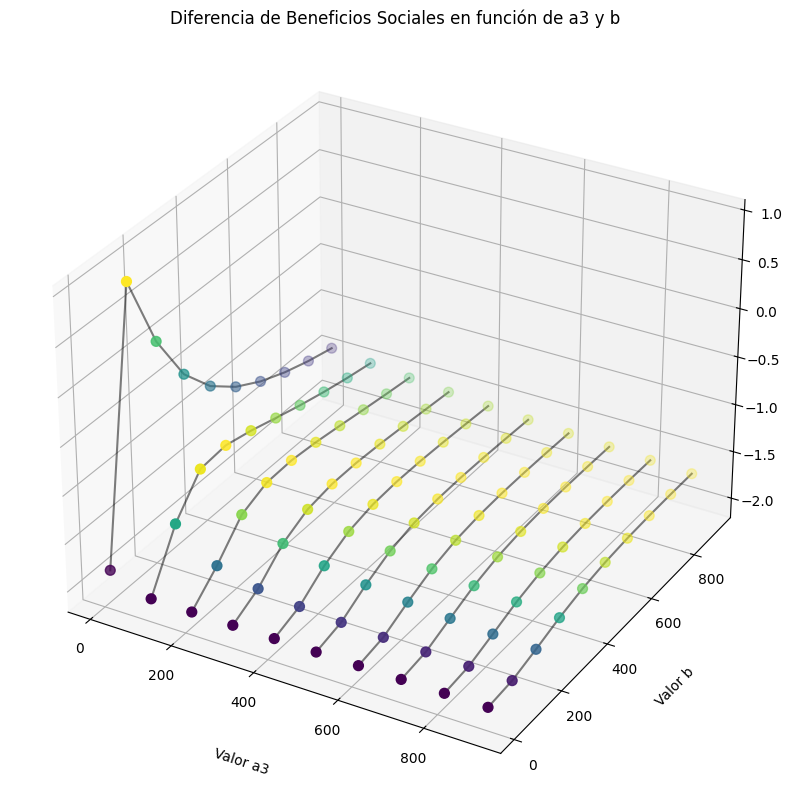

In [ ]:
fig = plt.figure(figsize=(12, 10))  # Aumentar tamaño
ax = fig.add_subplot(111, projection='3d')

# Ordenar el DataFrame por 'Valor a3' y 'Valor b' para evitar líneas desordenadas
df_rigi = df_rigi.sort_values(by=['Valor a3', 'Valor b'])

# Obtener valores únicos de a3
valores_a3 = df_rigi['Valor a3'].unique()

# Graficar puntos y líneas para cada valor de a3
for a3 in valores_a3:
    df_sub = df_rigi[df_rigi['Valor a3'] == a3]

    ax.scatter(df_sub['Valor a3'], df_sub['Valor b'], df_sub['Diferencia de BS'],
               c=df_sub['Diferencia de BS'], cmap='viridis', s=50)

    ax.plot(df_sub['Valor a3'], df_sub['Valor b'], df_sub['Diferencia de BS'], color='black', alpha=0.5)

ax.set_xlabel('Valor a3', labelpad=20)
ax.set_ylabel('Valor b', labelpad=15)
ax.set_zlabel('Diferencia de BS', labelpad=25)
ax.set_title('Diferencia de Beneficios Sociales en función de a3 y b')

plt.show()

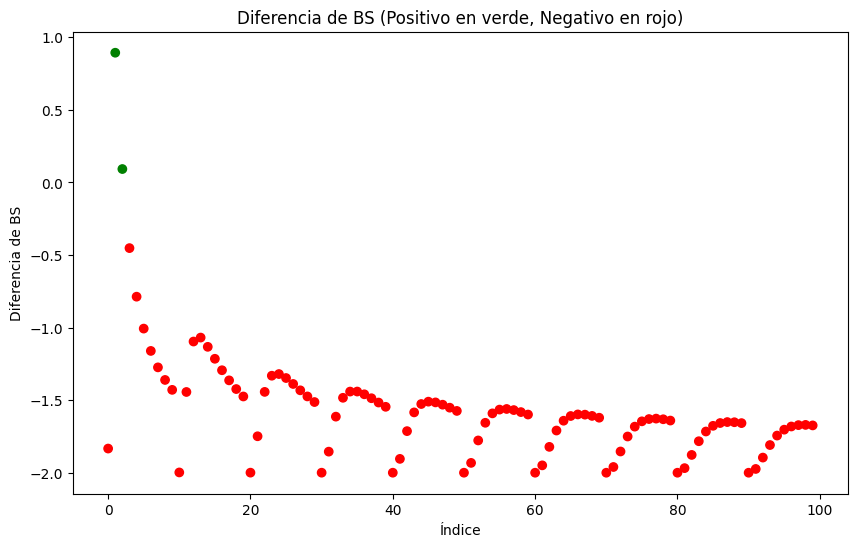

In [ ]:
import matplotlib.pyplot as plt

colores = ['green' if x > 0 else 'red' for x in df_rigi['Diferencia de BS']]

plt.figure(figsize=(10, 6))
plt.scatter(df_rigi.index, df_rigi['Diferencia de BS'], c=colores)

plt.xlabel('Índice')
plt.ylabel('Diferencia de BS')
plt.title('Diferencia de BS (Positivo en verde, Negativo en rojo)')

plt.show()

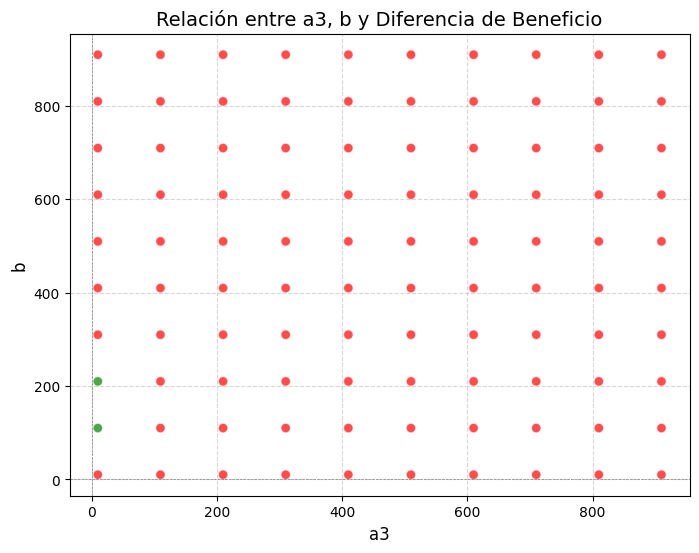

In [ ]:
import matplotlib.pyplot as plt

# Crear colores basados en la diferencia de beneficio
colors = df_rigi['Diferencia de BS'].apply(lambda x: 'green' if x > 0 else 'red')

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_rigi['Valor a3'], df_rigi['Valor b'], c=colors, s=50, edgecolor='white', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('a3', fontsize=12)
plt.ylabel('b', fontsize=12)
plt.title('Relación entre a3, b y Diferencia de Beneficio', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Línea horizontal en y=0 para referencia
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)  # Línea vertical en x=0 para referencia

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

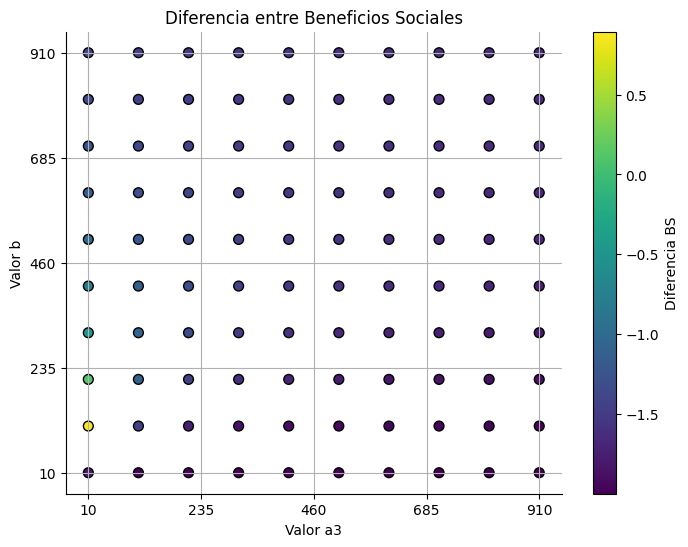

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_rigi['Valor a3'], df_rigi['Valor b'],
                      c=df_rigi['Diferencia de BS'], cmap='viridis',
                      s=50, edgecolor='k')

plt.colorbar(scatter, label='Diferencia BS')
plt.xlabel('Valor a3')
plt.ylabel('Valor b')
plt.title('Diferencia entre Beneficios Sociales')

# Definir valores de referencia en los ejes
x_min, x_max = df_rigi['Valor a3'].min(), df_rigi['Valor a3'].max()
y_min, y_max = df_rigi['Valor b'].min(), df_rigi['Valor b'].max()

x_ticks = np.linspace(x_min, x_max, num=5)  # 5 valores en el eje X
y_ticks = np.linspace(y_min, y_max, num=5)  # 5 valores en el eje Y

plt.xticks(x_ticks.round(2))  # Redondear para mejor legibilidad
plt.yticks(y_ticks.round(2))

plt.grid()
plt.gca().spines[['top', 'right']].set_visible(False)  # Ocultar bordes superiores y derechos

plt.show()


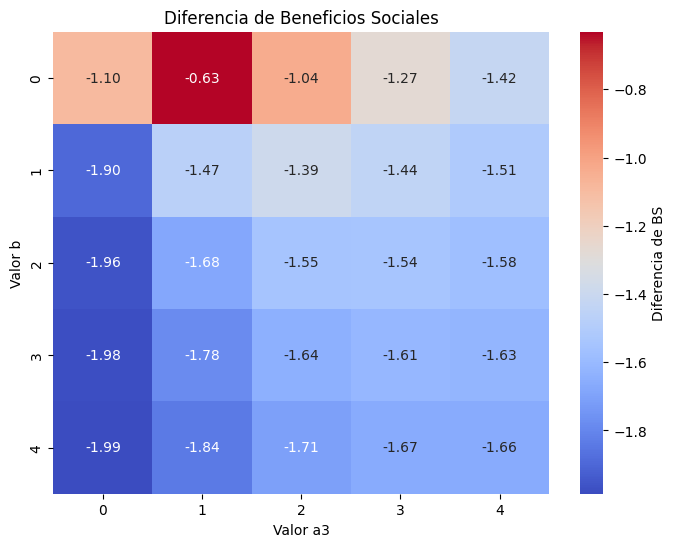

In [ ]:
# Redondear los valores para hacerlos discretos (opcional)
df_rigi['Valor a3'] = pd.cut(df_rigi['Valor a3'], bins=5, labels=False)
df_rigi['Valor b'] = pd.cut(df_rigi['Valor b'], bins=5, labels=False)

# Crear una tabla cruzada
heatmap_data = df_rigi.pivot_table(values='Diferencia de BS', index='Valor a3', columns='Valor b', aggfunc='mean')

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Diferencia de BS'})
plt.xlabel('Valor a3')
plt.ylabel('Valor b')
plt.title('Diferencia de Beneficios Sociales')
plt.show()